<a href="https://colab.research.google.com/github/hurdi7/Sustainable_product_purchasing_behaviour/blob/main/ML%20Framework%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 7.9 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=bc1a7eb1dd370a5c37c716f8ee0109ac880458e43cb78f52c2037a62c925b543
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [3]:
import pandas as pd
import semopy

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/hurdi7/Sustainable_product_purchasing_behaviour/refs/heads/main/Test%20data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GC      98 non-null     int64
 1   DE1     98 non-null     int64
 2   DE2     98 non-null     int64
 3   DE3     98 non-null     int64
 4   CS1     98 non-null     int64
 5   CS2     98 non-null     int64
 6   CS3     98 non-null     int64
 7   SN1     98 non-null     int64
 8   SN2     98 non-null     int64
 9   SN3     98 non-null     int64
 10  ASP1    98 non-null     int64
 11  ASP2    98 non-null     int64
 12  ASP3    98 non-null     int64
 13  PCE1    98 non-null     int64
 14  PCE2    98 non-null     int64
 15  PCE3    98 non-null     int64
 16  TLP1    98 non-null     int64
 17  TLP2    98 non-null     int64
 18  TLP3    98 non-null     int64
 19  SPPI1   98 non-null     int64
 20  SPPI2   98 non-null     int64
 21  SPPI3   98 non-null     int64
 22  SPPB1   98 non-null     int64
 23  SPPB2   98 non-nu

In [20]:
from semopy import Model

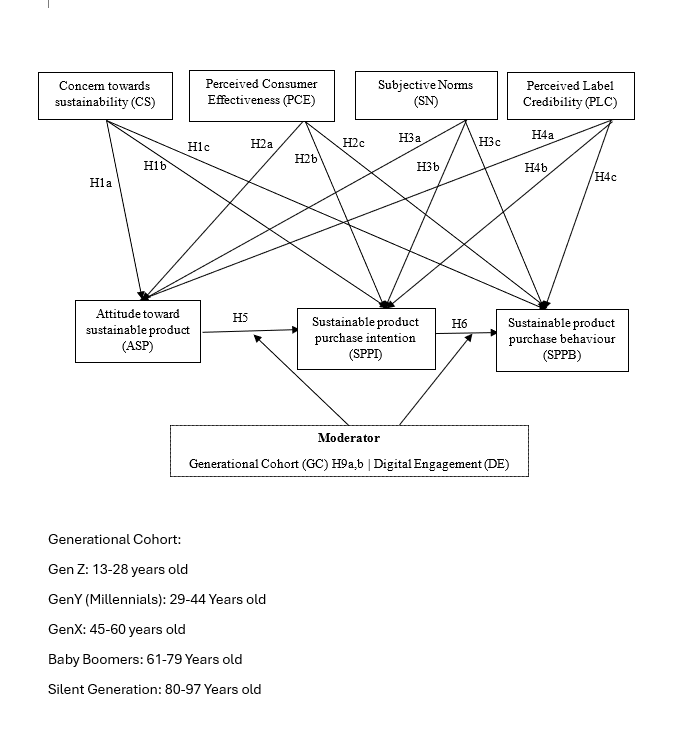

The model for the Structural Equation Modelling

In [21]:
model_spec = """
    # Measurement model
    CS =~ CS1 + CS2 + CS3
    PCE =~ PCE1 + PCE2 + PCE3
    SN =~ SN1 + SN2 + SN3
    TLP =~ TLP1 + TLP2 + TLP3
    ASP =~ ASP1 + ASP2 + ASP3
    SPPI =~ SPPI1 + SPPI2 + SPPI3
    SPPB =~ SPPB1 + SPPB2 + SPPB3
    DE =~ DE1 + DE2 + DE3

    # Regressions
    ASP ~ CS + PCE + SN + TLP
    SPPI ~ CS + PCE + SN + TLP + ASP
    SPPB ~ CS + PCE + SN + TLP + SPPI

"""
#Here we take the initial model without any Moderators

In [22]:
model = Model(model_spec)
model.fit(df)
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ASP,~,CS,-1.946060,12.321789,-0.157936,0.874507
1,ASP,~,PCE,7.353227,38.798701,0.189523,0.849683
2,ASP,~,SN,0.180161,2.229043,0.080824,0.935582
3,ASP,~,TLP,-0.421721,3.0206,-0.139615,0.888964
4,SPPI,~,CS,-0.279423,0.548054,-0.509846,0.61016
...,...,...,...,...,...,...,...
75,SPPI2,~~,SPPI2,0.489427,0.085066,5.75348,0.0
76,SPPI3,~~,SPPI3,0.443201,0.090975,4.871663,0.000001
77,TLP1,~~,TLP1,0.399523,0.063225,6.319015,0.0
78,TLP2,~~,TLP2,0.635275,0.092179,6.891742,0.0


In [23]:
latent_scores = model.predict_factors(df)
df = pd.concat([df,latent_scores],axis=1)

In [29]:
df['ASP_c'] = df['ASP'] - df['ASP'].mean()
df['SPPI_c'] = df['SPPI'] - df['SPPI'].mean()
df['DE_c'] = df['DE'] - df['DE'].mean()
df['GC_c'] = df['GC'] - df['GC'].mean()

In [30]:
df['ASP_GC'] = df['ASP_c'] * df['GC_c']
df['SPPI_DE'] = df['SPPI_c'] * df['DE_c']

In [31]:
#Model with moderation

moderation_model = """
    SPPI ~ CS + PCE + SN + TLP + ASP_c + GC_c + ASP_GC
    SPPB ~ CS + PCE + SN + TLP + SPPI_c + DE_c + SPPI_DE

"""
mod_model = Model(moderation_model)
mod_model.fit(df)
mod_model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,SPPI,~,CS,-0.362869,0.055107,-6.584793,4.555201e-11
1,SPPI,~,PCE,-0.312310,0.179329,-1.741541,8.158871e-02
2,SPPI,~,SN,0.291539,0.017459,16.698362,0.000000e+00
3,SPPI,~,TLP,0.051325,0.016647,3.083117,2.048446e-03
4,SPPI,~,ASP_c,0.698873,0.057304,12.195820,0.000000e+00
5,SPPI,~,GC_c,-0.002105,0.003803,-0.553485,5.799313e-01
6,SPPI,~,ASP_GC,-0.016339,0.027871,-0.586230,5.577208e-01
7,SPPB,~,CS,1.335856,0.235057,5.683122,1.322579e-08
8,SPPB,~,PCE,2.599389,0.625045,4.158724,3.200303e-05
9,SPPB,~,SN,-0.205823,0.102854,-2.001127,4.537873e-02
